In [1]:
%cd /home/maximilianheil/fungiclef-2024/

/home/maximilianheil/fungiclef-2024


In [10]:
import pyspark.sql.functions as f
import pyspark.ml as ml
from pyspark.sql.types import ArrayType, FloatType, IntegerType
import fungiclef.transforms as trans
from fungiclef.utils import get_spark, read_config
from PIL import Image
import io

In [3]:
spark = get_spark(**{
    "spark.sql.parquet.enableVectorizedReader": False, 
})
display(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/07 20:29:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/07 20:29:46 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
24/04/07 20:29:47 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/04/07 20:29:47 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [7]:
import os
os.getcwd()

'/home/maximilianheil/fungiclef-2024'

In [8]:
config = read_config(path='fungiclef/config.json')

In [9]:
gcs_parquet_path = config['gs_paths']['parquet']['training_data']

df = spark.read.parquet(gcs_parquet_path)

df.printSchema()

In [12]:
first_row = df.limit(1)

first_row.show()

24/04/07 20:32:02 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+--------------------+-------------+------+-----+----+-----------+--------------+-------+--------------------+-------+-------------+--------------+---------------+----------------+---------+---------------+---------+------------------+---------+----------+---------+-----------+----------+----------+-----------------+--------------------+-------------------+---------+---------+----------+--------+--------+-------------+---------+
|          image_path|                data|observationID|  year|month| day|countryCode|      locality|taxonID|      scientificName|kingdom|       phylum|         class|          order|          family|    genus|specificEpithet|taxonRank|           species|level0Gid|level0Name|level1Gid| level1Name| level2Gid|level2Name|    ImageUniqueID|           Substrate|       rightsHolder| Latitude|Longitude|CoorUncert| Habitat|class_id|MetaSubstrate|poisonous|
+--------------------+--------------------+-------------+------+-----+----+-----------+-----

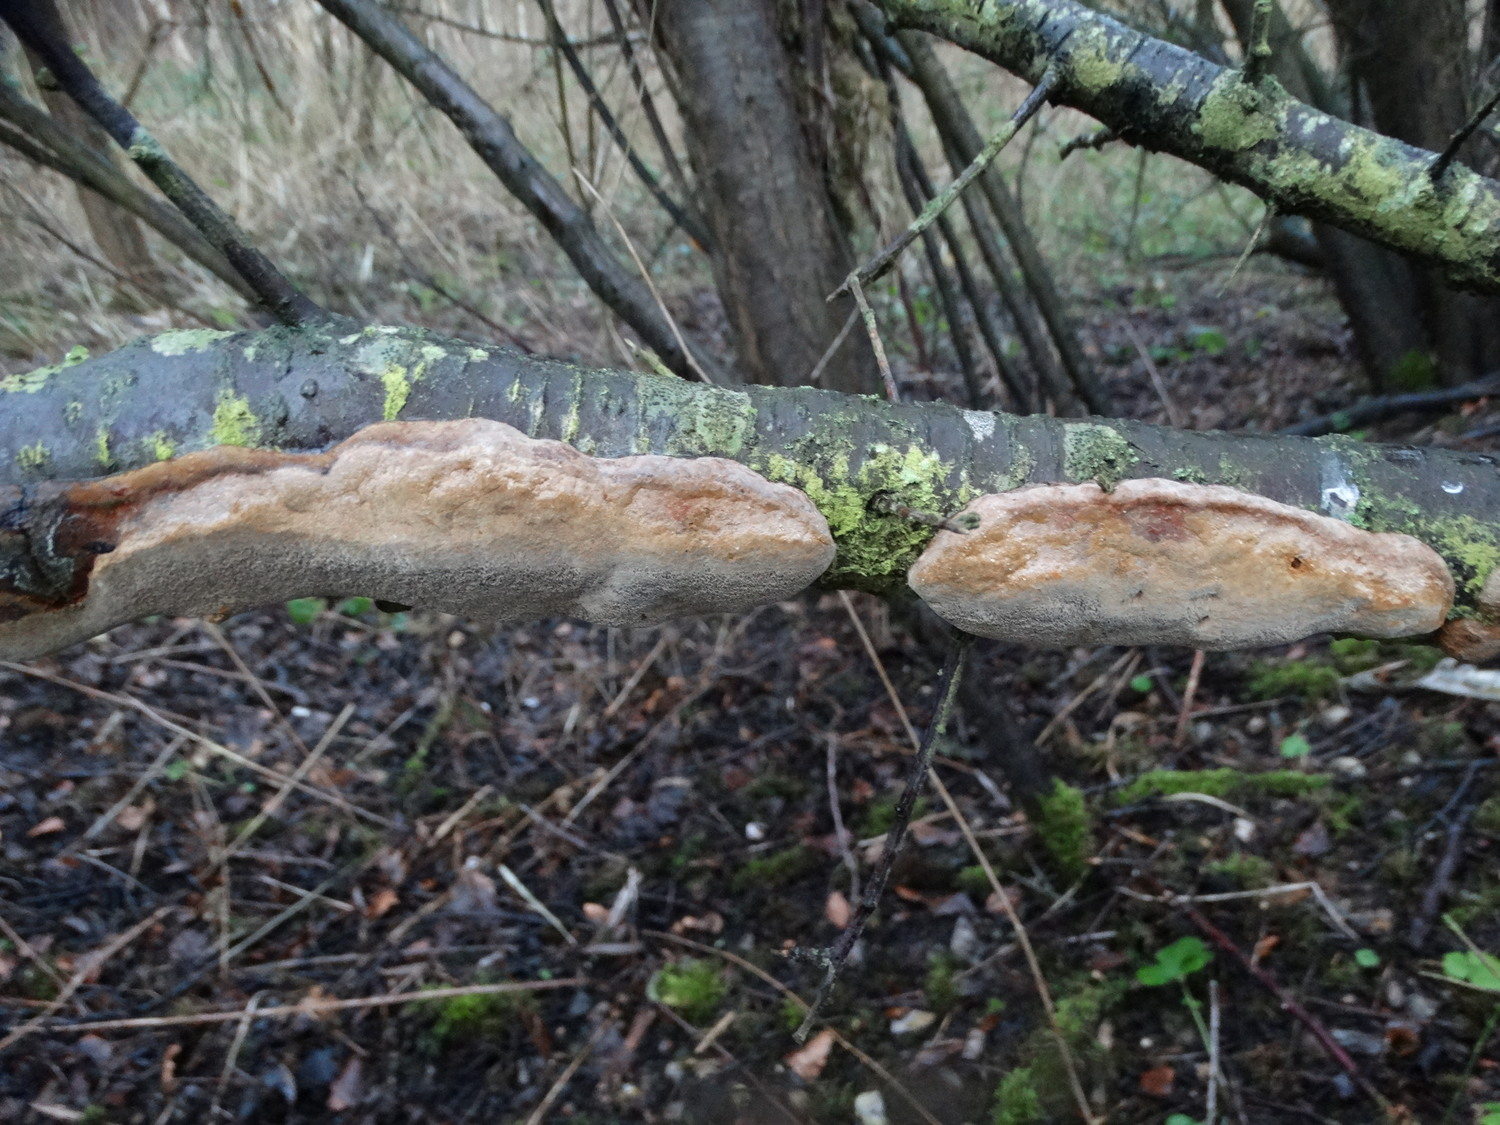

In [20]:
images_as_byte = first_row.select('data').collect()[0]['data']

Image.open(io.BytesIO(images_as_byte))